In [1]:
import numpy as np   
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt


# **0. Data Preparing**

In [2]:
#load data
df = pd.read_csv('./EasyVisa.csv')
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## **0.1. Inspect the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [4]:
df.shape

(25480, 12)

In [5]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [6]:
df[df.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

1. The dataset has 25480 rows and 12 columns.
2. The dataset has no missing values
3. *"no_of_employees"*, *"yr_of_estab"*, and *"prevailing_wage"* are numeric data type. The others are object that may need to be converted later.
4. No duplicated data.

## **0.2. Summary of the Dataset**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


1. The negative number (including "0") of no_of_emplyees does not make sense. Removing them from the dataset is better for the analysis.

In [8]:
df.drop(df[df['no_of_employees']<=0].index, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25447.0,5674.415334,22891.842245,12.0000,1025.00,2112.0,3506.500,602069.00
yr_of_estab,25447.0,1979.394506,42.385932,1800.0000,1976.00,1997.0,2005.000,2016.00
prevailing_wage,25447.0,74468.281479,52822.177370,2.1367,34039.21,70312.5,107739.505,319210.27


1. The min of *"prevailing_wage"* and *'std'* seem wield compared with the mean because the amount of wages are collected by different frequency. Grouping the wages by *'unit_of_wage'* is better approch.

In [9]:
df.groupby(by=['unit_of_wage'])['prevailing_wage'].describe().T

unit_of_wage,Hour,Month,Week,Year
count,2153.000000,89.000000,272.000000,22933.000000
mean,414.773882,87592.864045,85606.820515,81237.541122
std,275.052214,59525.124924,44802.704810,49959.089955
min,2.136700,1599.280000,2183.230000,100.000000
25%,152.700300,44986.240000,51408.277500,43741.960000
50%,373.204500,81826.010000,85075.820000,76172.830000
75%,637.311100,121629.600000,111331.910000,111341.970000
max,999.919500,264362.950000,280175.950000,319210.270000


In [10]:
df.describe(include=['object']).T

,count,unique,top,freq
case_id,25447,25447,EZYV01,1
continent,25447,6,Asia,16840
education_of_employee,25447,4,Bachelor's,10220
has_job_experience,25447,2,Y,14786
requires_job_training,25447,2,N,22498
region_of_employment,25447,5,Northeast,7189
unit_of_wage,25447,4,Year,22933
full_time_position,25447,2,Y,22741
case_status,25447,2,Certified,17001


 1. *"case_id'* just does not make any sense for the application. We can drop it.
 2. Most *"continent"* is *"Asia"* that beats other 5 continents. We can apply the same observations to the remaining columns to learn the data.

In [11]:
#drop case_id
df.drop(['case_id'],axis=1,inplace=True)

# **1. Exploratory Data Analysis (EDA)**

## **1.1. Univariate**

In [12]:
# Build a function to facilate plotting the features

def univ_plot(dataset,x,kde=True):
    fig,axs = plt.subplots(
        nrows=2,
        figsize=(16,9),
        gridspec_kw={'height_ratios': [1, 3]})
    
    sns.histplot(dataset,x=x, kde=True,ax=axs[1])
    axs[1].axvline(x=x.mean(),color='darkred',linestyle='--')
    axs[1].axvline(x=x.median(),color='darkgreen',linestyle='--')
    sns.boxplot(x= x,ax=axs[0],showmeans=True,color='purple')

    plt.show()


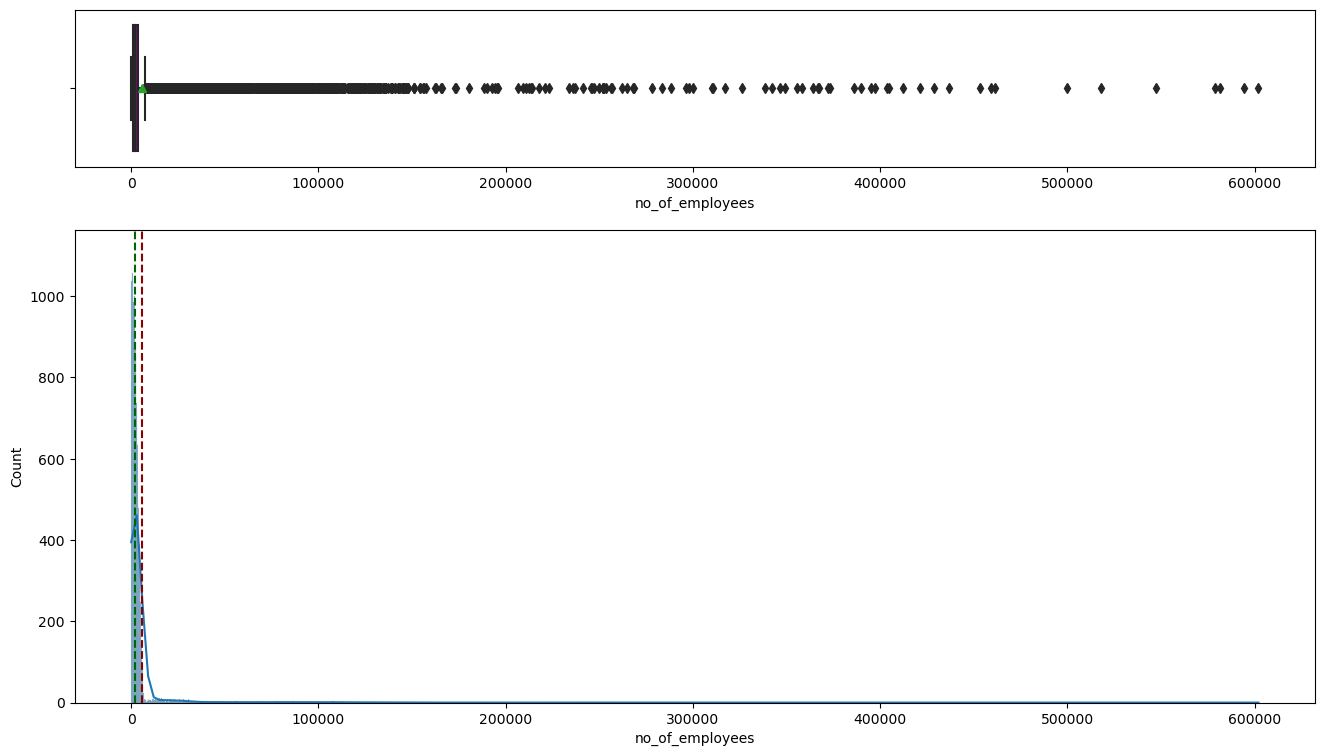

In [13]:
univ_plot(df,df['no_of_employees'])

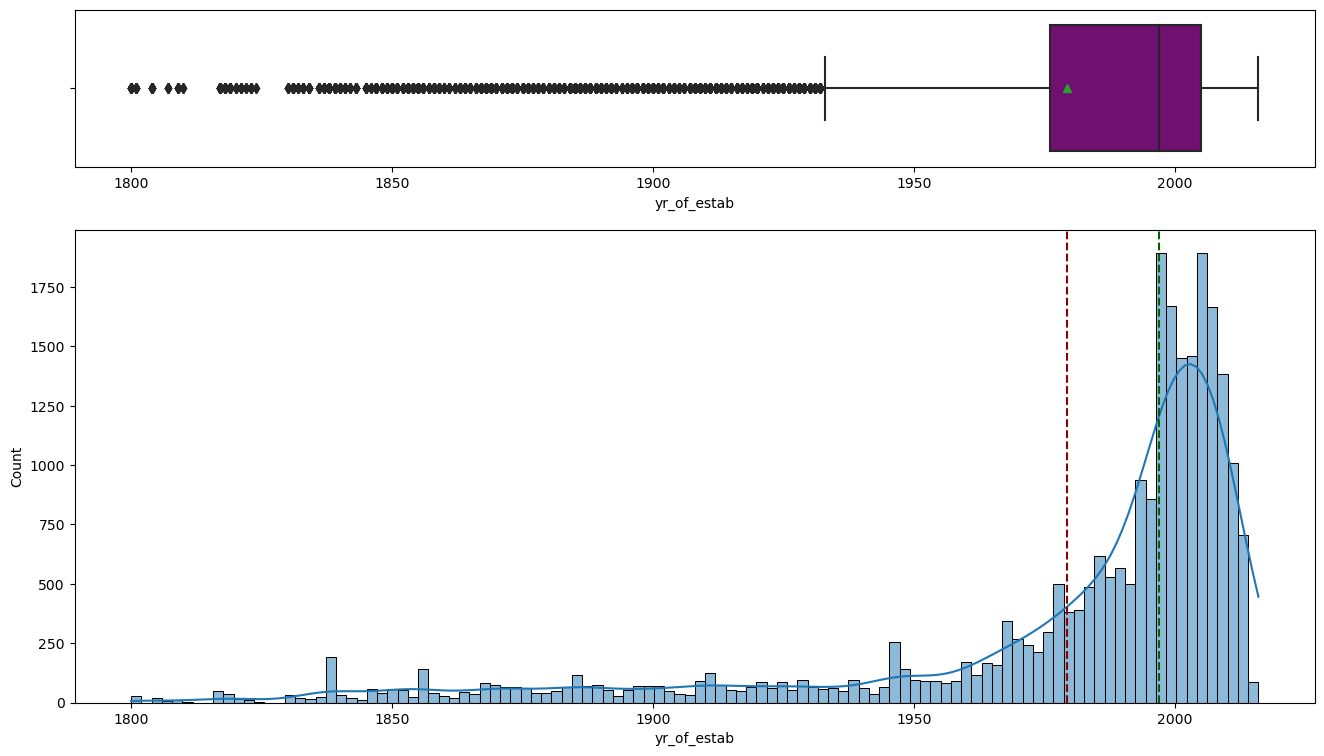

In [14]:
univ_plot(df,df['yr_of_estab'])

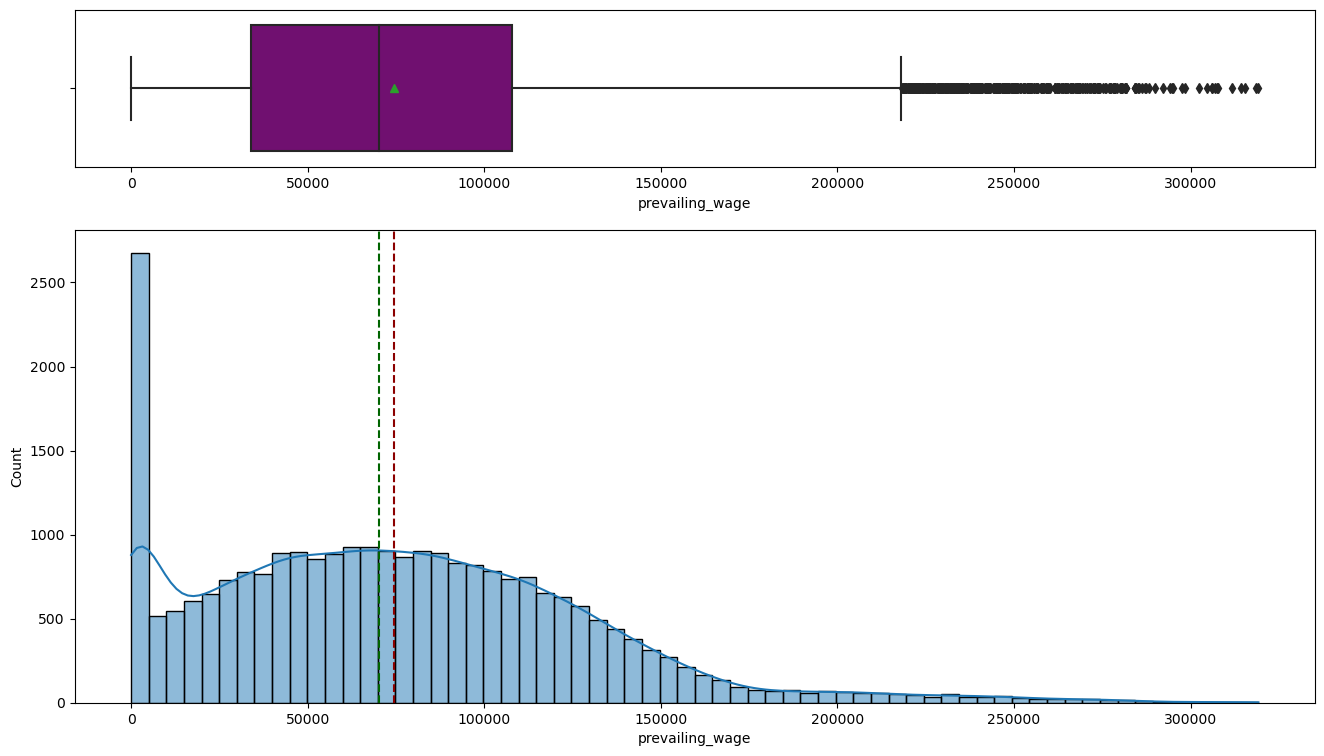

In [15]:
univ_plot(df,df['prevailing_wage'])

1. The *'prevailing_wage'* seems not right.

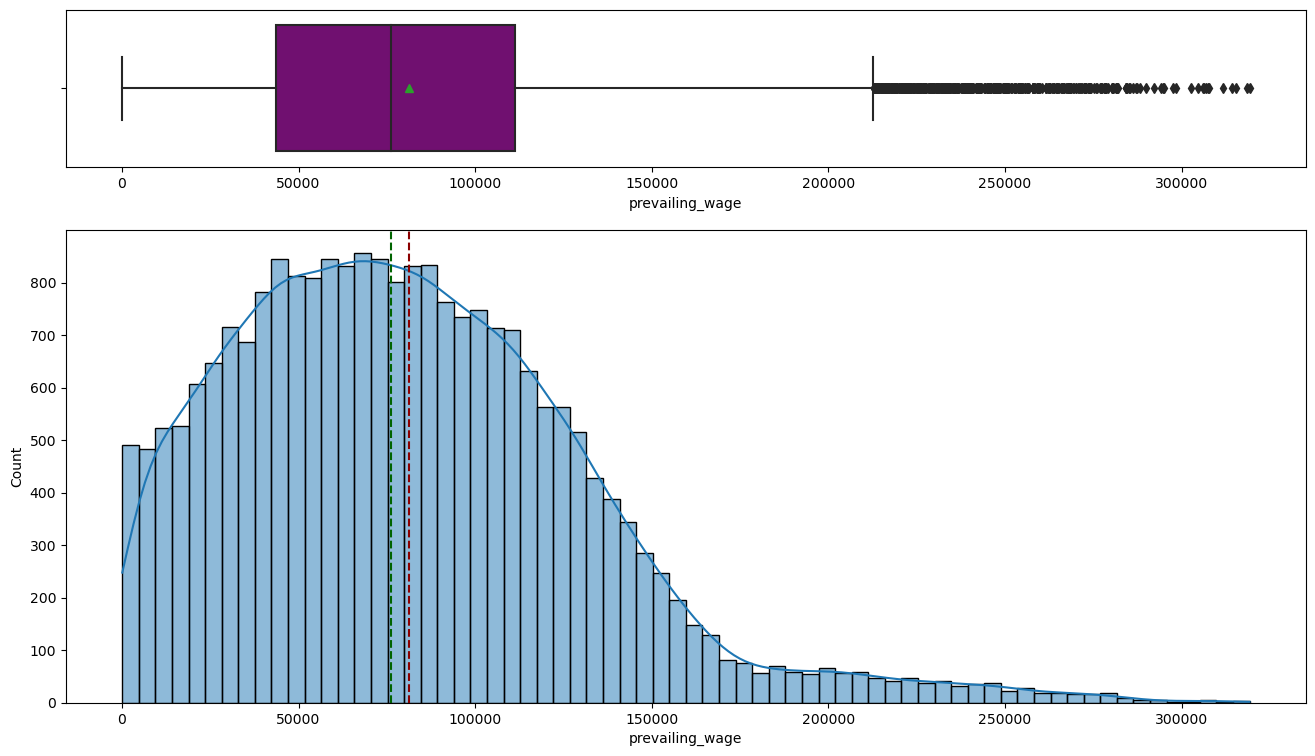

In [16]:
dataset = df[df['unit_of_wage']=='Year']
x = df[df['unit_of_wage']=='Year']['prevailing_wage']
univ_plot(dataset,x)

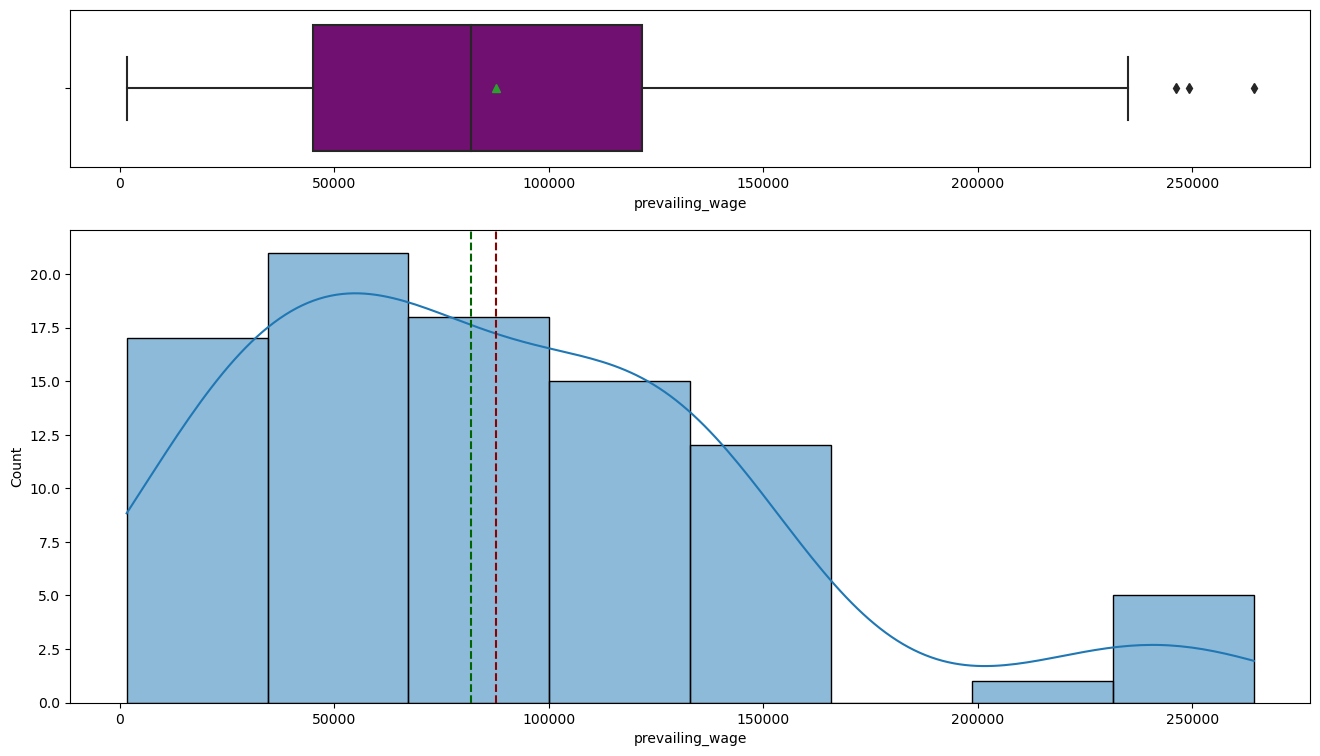

In [17]:
dataset = df[df['unit_of_wage']=='Month']
x = df[df['unit_of_wage']=='Month']['prevailing_wage']
univ_plot(dataset,x)

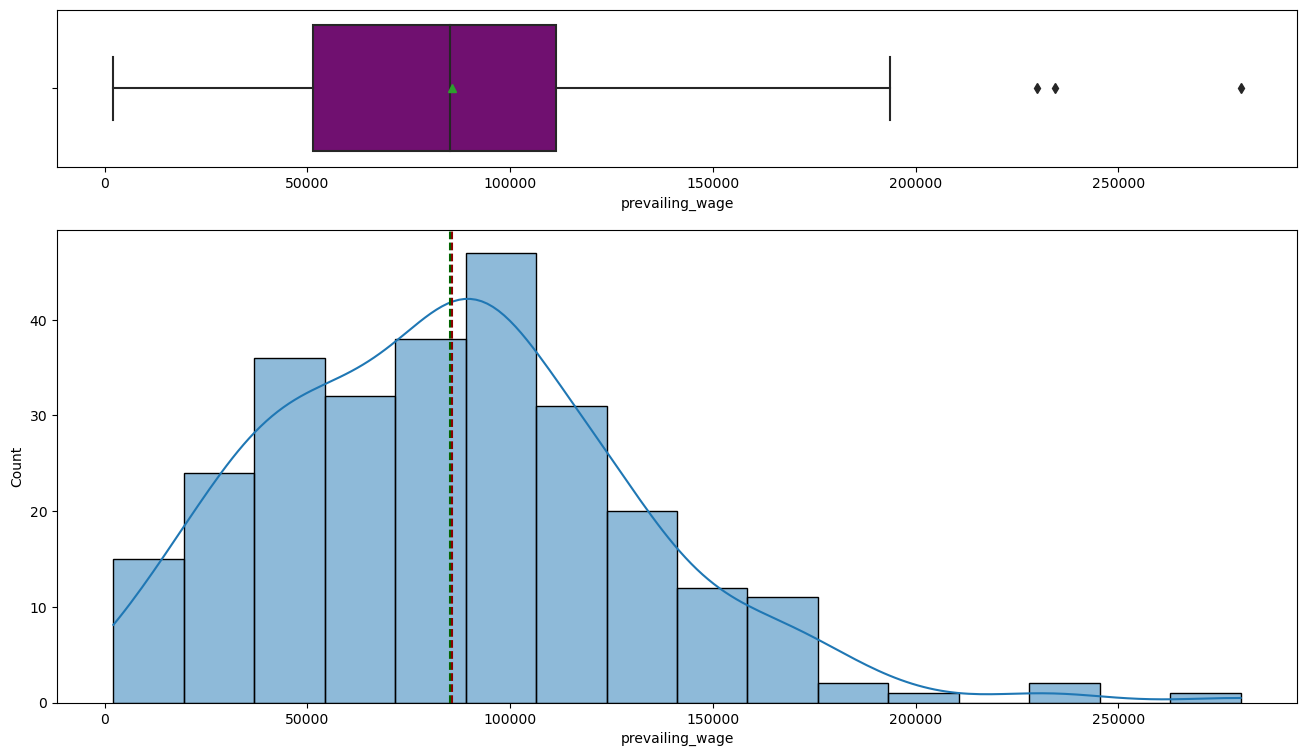

In [18]:
dataset = df[df['unit_of_wage']=='Week']
x = df[df['unit_of_wage']=='Week']['prevailing_wage']
univ_plot(dataset,x)

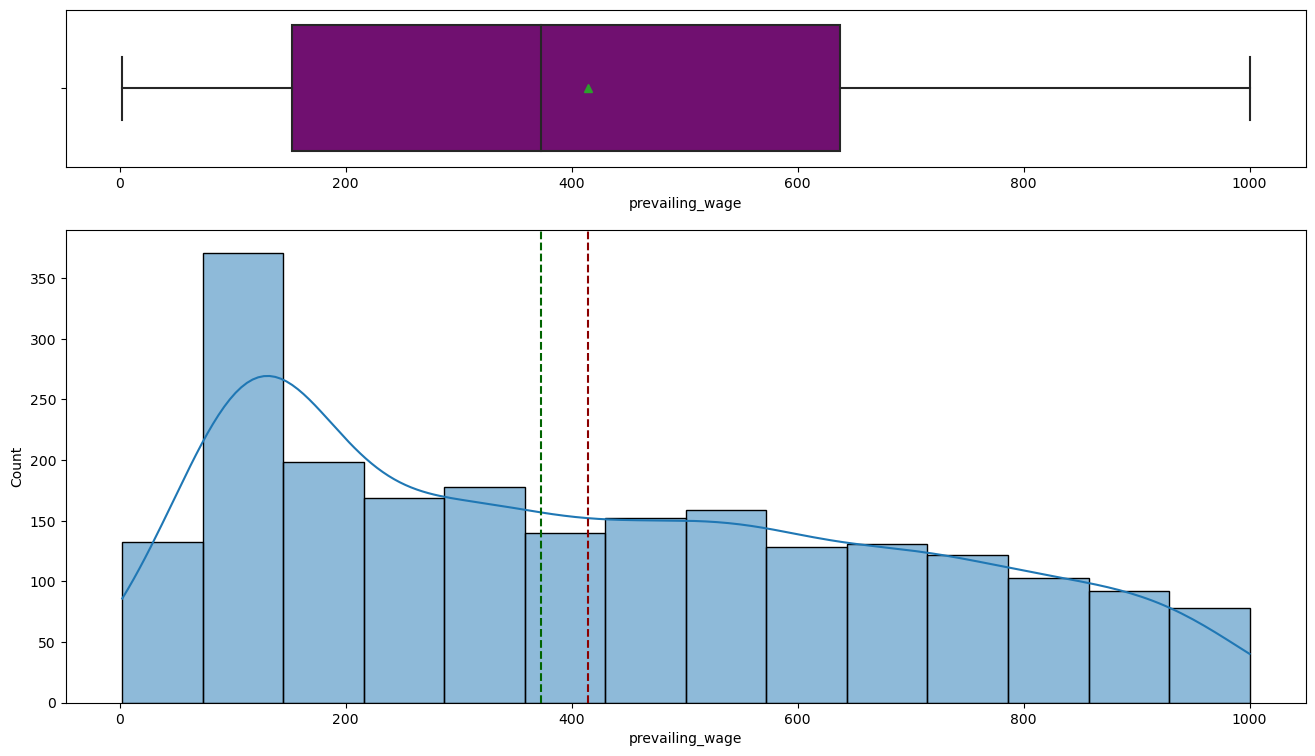

In [19]:
dataset = df[df['unit_of_wage']=='Hour']
x = df[df['unit_of_wage']=='Hour']['prevailing_wage']
univ_plot(dataset,x)

1. *'prevailing_wage'* needs to be adjuested to a same frequence basis, such as annually.
2. data are labeled with "month" and "weekly" could actually be "year", according to the observation to their mean and median that are similar with them of year. We should re-label them.
3. If we calculate that mean of hour times 4 (weeks) then times 52 (months), we get the similar mean with year. Therefore,the best guess is the data in hour actually are in week. We also need them to be corrected.

In [20]:
df.loc[df['unit_of_wage'] == 'Hour','prevailing_wage'] = \
df.loc[df['unit_of_wage'] == 'Hour','prevailing_wage'] * 4 * 52
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,123178.2032,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


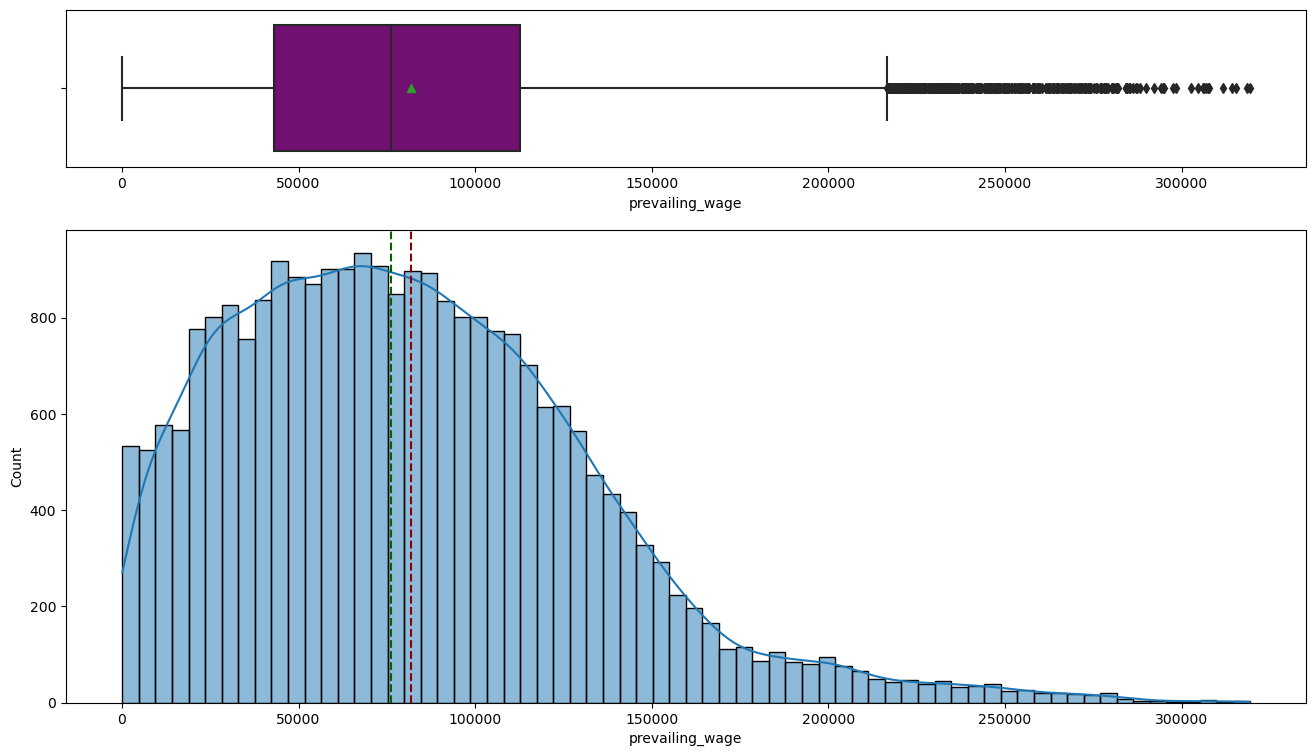

In [21]:
# re-plot the prevailing_wage
univ_plot(df,df['prevailing_wage'])

1. It seems better now, no bin outstandingly outnumbers others.

In [22]:
pct = ((df['continent'].value_counts() / df['continent'].count()) * 100).round(2)

pct

Asia             66.18
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: continent, dtype: float64

In [23]:
# Build a function to facilate plotting the features
def univ_pct_plot(data,hue=None):
    plt.figure(figsize=(8,2))

    # Countplot
    ax = sns.countplot(
        y = data,
        hue=hue,
        order = data.value_counts().index
    )
    total = len(data)
    # Annotation
    for p in ax.patches:
        an_txt = "{:.1f}%".format(100 * p.get_width()/total)
        x = p.get_width()
        y = p.get_height()/2 + p.get_y()
        ax.annotate(an_txt,(x,y))

    plt.show()


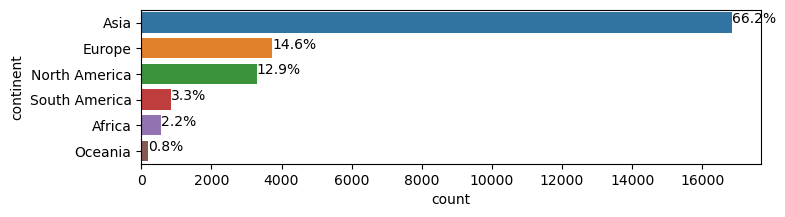

In [24]:
univ_pct_plot(df['continent'])

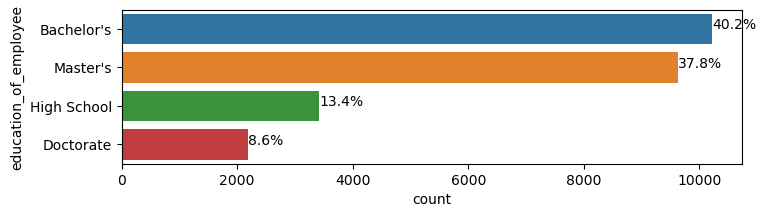

In [25]:
univ_pct_plot(df['education_of_employee'])

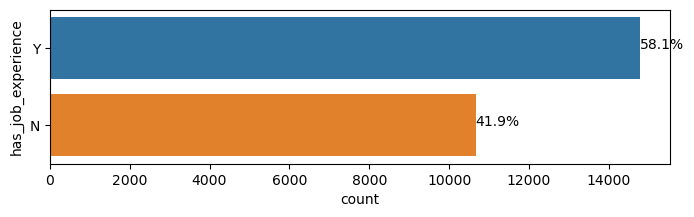

In [26]:
univ_pct_plot(df['has_job_experience'])

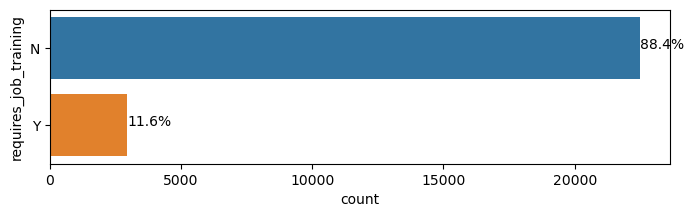

In [27]:
univ_pct_plot(df['requires_job_training'])

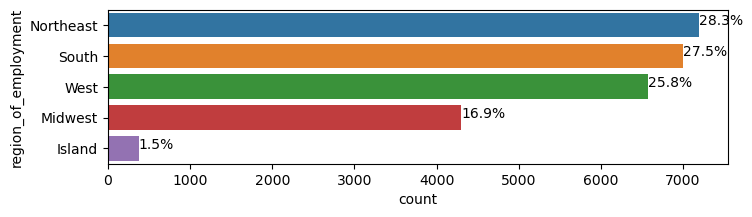

In [28]:
univ_pct_plot(df['region_of_employment'])

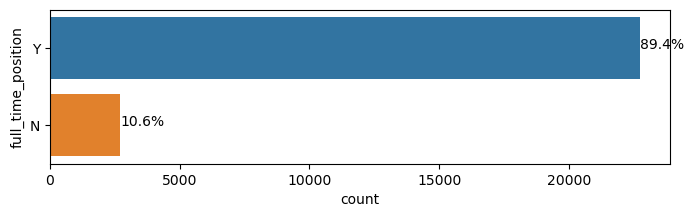

In [29]:
univ_pct_plot(df['full_time_position'])

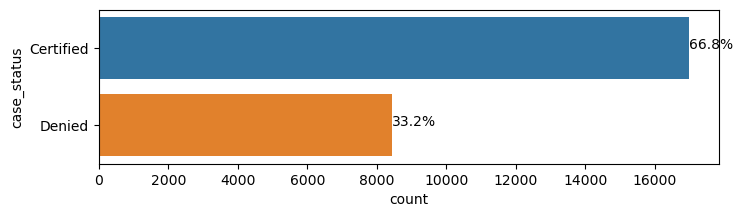

In [30]:
univ_pct_plot(df['case_status'])

## **1.2. Bivariate**

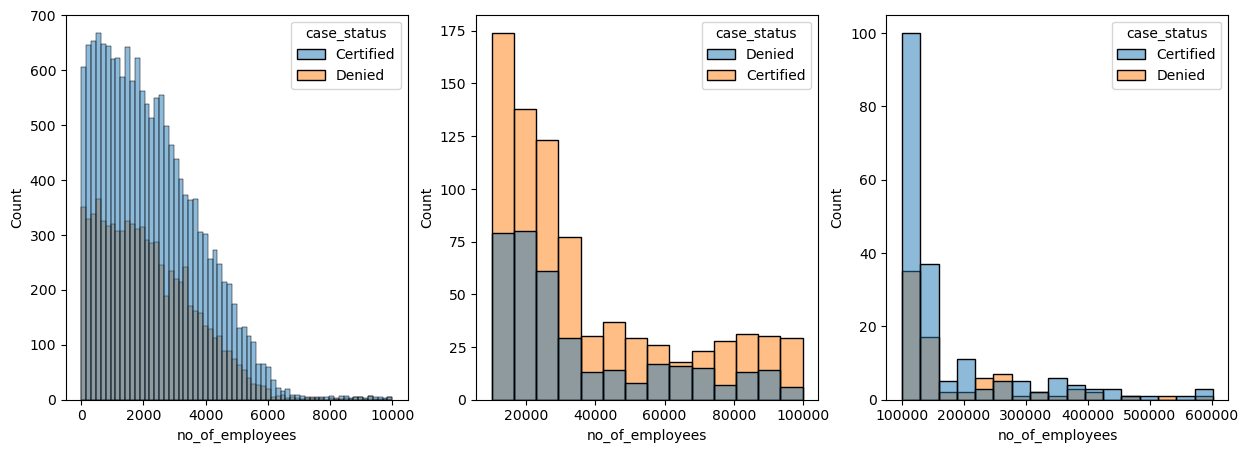

In [31]:
# Let us try 3 categories with 1K and 100K as the separators
fig,ax=plt.subplots(1,3, figsize=(15,5))
sns.histplot(data=df[df["no_of_employees"]<10000], x="no_of_employees", hue="case_status", ax=ax[0]);
sns.histplot(data=df[(df["no_of_employees"]>=10000)  & (df["no_of_employees"]<100000)], x="no_of_employees", hue="case_status", ax=ax[1]);
sns.histplot(data=df[df["no_of_employees"]>=100000], x="no_of_employees", hue="case_status", ax=ax[2]);

1. *'no_of_employee'* has little to do with the result, the actual number of employees in the company is meaningless to the decision. It should be the size of the company. Therefore, we split them into 3 categories: small, medium and large with 25% and 75% in the number as the seperators.

In [32]:
df["no_of_employees"] = pd.cut(
        df["no_of_employees"], 
        [0, df['no_of_employees'].quantile(.25), df['no_of_employees'].quantile(.75), np.inf],
        labels = ["Small_Sized", "Medium_Sized", "Large_Sized"]
    )
df.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,Large_Sized,2007,West,123178.2032,Hour,Y,Denied
1,Asia,Master's,Y,N,Medium_Sized,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,Large_Sized,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,Small_Sized,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,Medium_Sized,2005,South,149907.3900,Year,Y,Certified


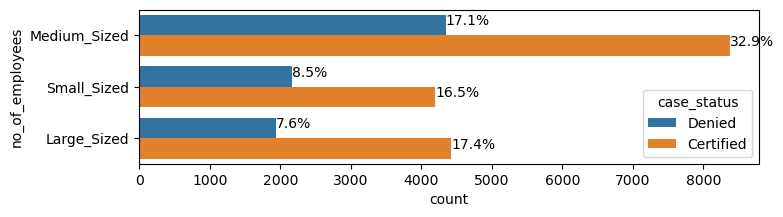

In [33]:
# Try plot again
univ_pct_plot(df['no_of_employees'],hue=df['case_status'])

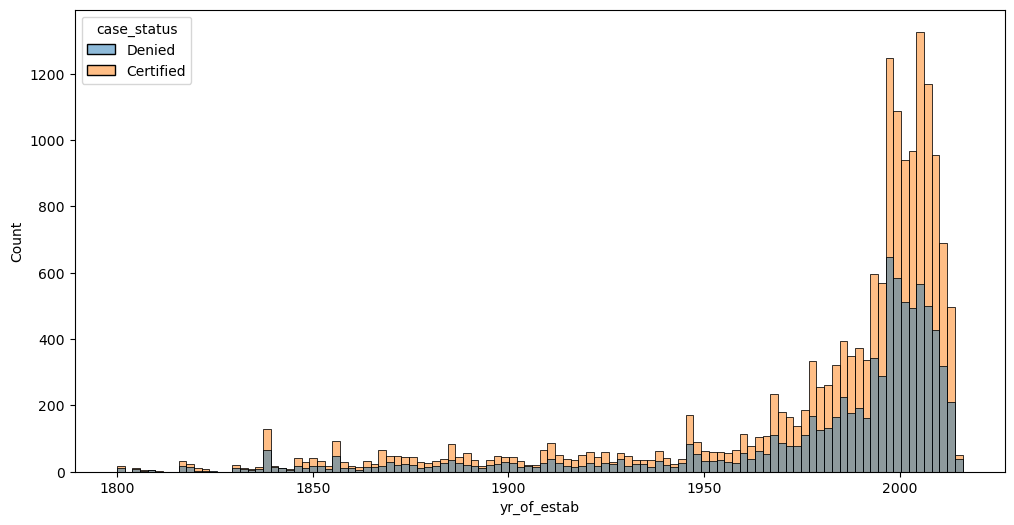

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df,x='yr_of_estab',hue=df['case_status'])
plt.show()

In [35]:
# Cut yr_of_estab with median as seperator 
df["yr_of_estab"] = pd.cut(
        df["yr_of_estab"], 
        [0, df['yr_of_estab'].quantile(.50), np.inf],
        labels = ["OlderYears", "NewerYears"]
    )
df.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,Large_Sized,NewerYears,West,123178.2032,Hour,Y,Denied
1,Asia,Master's,Y,N,Medium_Sized,NewerYears,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,Large_Sized,NewerYears,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,Small_Sized,OlderYears,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,Medium_Sized,NewerYears,South,149907.3900,Year,Y,Certified


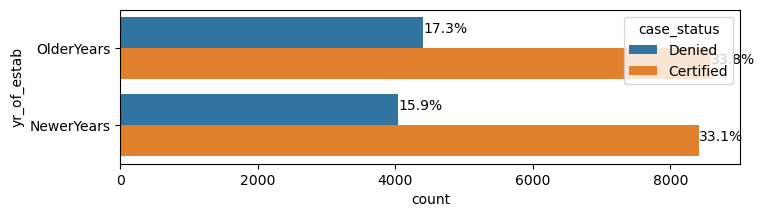

In [36]:
# Try plot again
univ_pct_plot(df['yr_of_estab'],hue=df['case_status'])

In [38]:
df.loc[df["unit_of_wage"] != "Hour",'unit_of_wage']

1        Year
2        Year
3        Year
4        Year
5        Year
         ... 
25475    Year
25476    Year
25477    Year
25478    Year
25479    Year
Name: unit_of_wage, Length: 23294, dtype: object

In [39]:
# unit_of_wage shoule be broken into "hourly" and "Not_hourly"
df.loc[df["unit_of_wage"] == "Hour",'unit_of_wage'] = 'hourly' 
df.loc[df["unit_of_wage"] != "hourly",'unit_of_wage'] = 'not_hourly' 


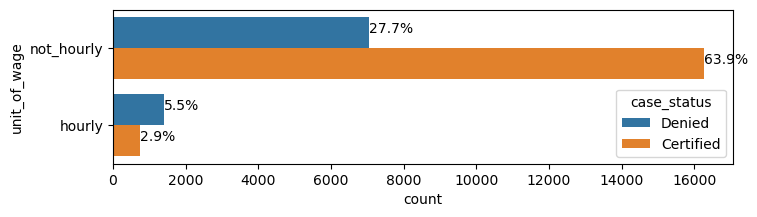

In [40]:
univ_pct_plot(df['unit_of_wage'],hue=df['case_status'])

1, In the category of *'hourly'*, the denied outnumbered the certified, and in the *'not_hourly'* is in the opposite.

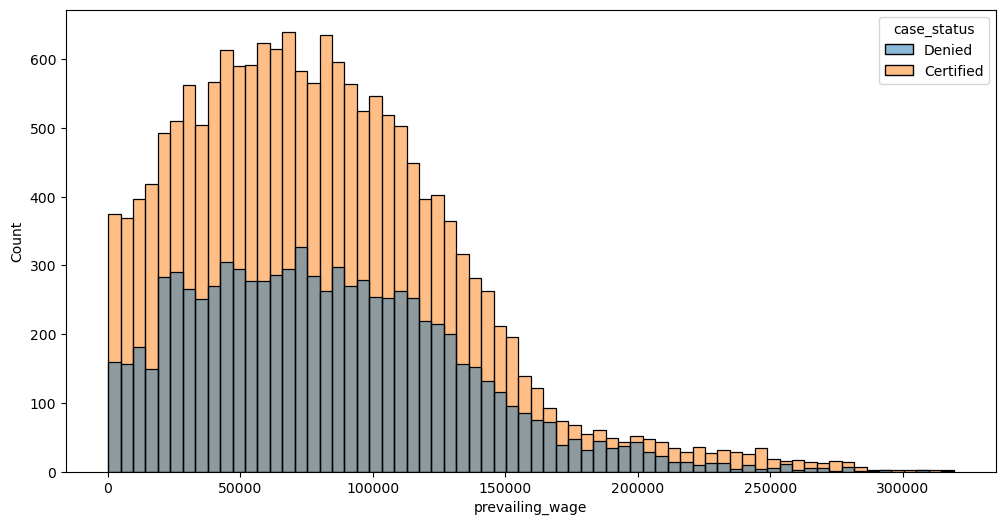

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df,x='prevailing_wage',hue=df['case_status'])
plt.show()

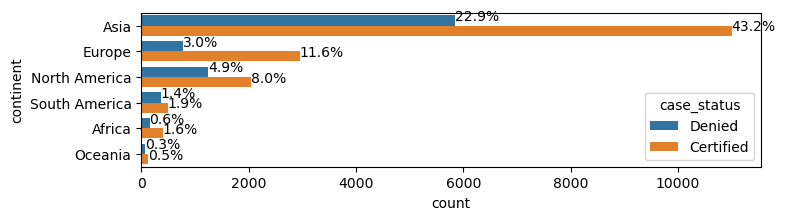

In [42]:
univ_pct_plot(df['continent'],hue=df['case_status'])

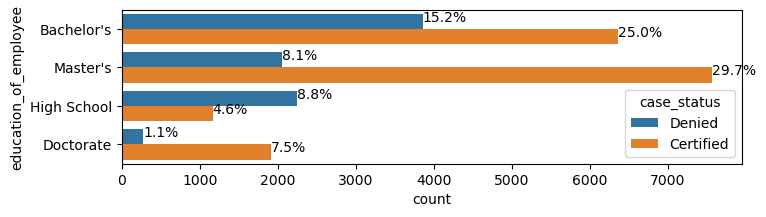

In [43]:
univ_pct_plot(df['education_of_employee'],hue=df['case_status'])

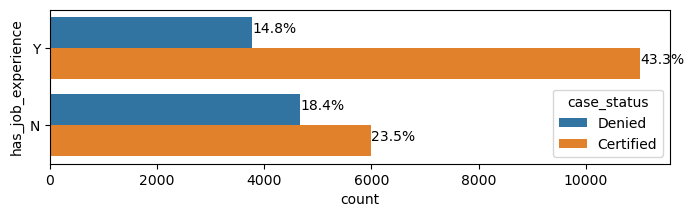

In [44]:
univ_pct_plot(df['has_job_experience'],hue=df['case_status'])

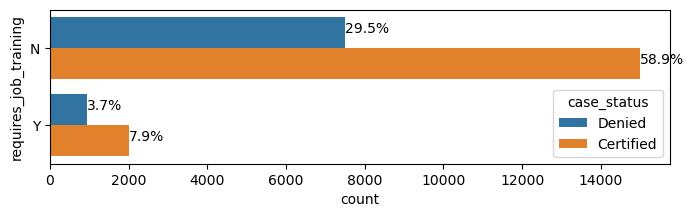

In [45]:
univ_pct_plot(df['requires_job_training'],hue=df['case_status'])

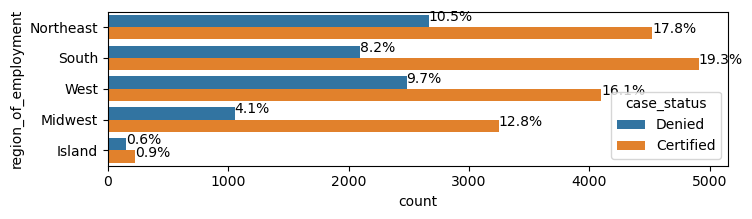

In [46]:
univ_pct_plot(df['region_of_employment'],hue=df['case_status'])

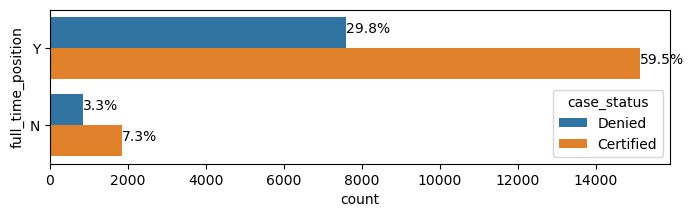

In [47]:
univ_pct_plot(df['full_time_position'],hue=df['case_status'])

# **2. Modeling**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,Normalizer
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline


## **2.1. Data Encoding & Spilitting**

### *2.1.1. Splitting*

In [49]:
X = df.loc[:,df.columns != 'case_status']
y = df['case_status']

In [50]:
# Encode Target - y
y = y.apply(lambda x: 0 if x == "Denied" else 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,stratify=y,test_size=0.30)

### *2.1.2. Encoding*

In [52]:
df.dtypes

continent                  object
education_of_employee      object
has_job_experience         object
requires_job_training      object
no_of_employees          category
yr_of_estab              category
region_of_employment       object
prevailing_wage           float64
unit_of_wage               object
full_time_position         object
case_status                object
dtype: object

In [53]:
X.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,Asia,High School,N,N,Large_Sized,NewerYears,West,123178.2032,hourly,Y
1,Asia,Master's,Y,N,Medium_Sized,NewerYears,Northeast,83425.6500,not_hourly,Y
2,Asia,Bachelor's,N,Y,Large_Sized,NewerYears,West,122996.8600,not_hourly,Y


1. Nominal data are *'continent'*, *'has_job_experience'*, *'requires_job_training'*, *'region_of_employment'*, *'unit_of_wage'*, and *'full_time_position'*
2. Ordinal data are *'education_of_employee'* , *'no_of_employees'*, *'yr_of_estab'*, 
3. Numeric data is '*prevailing_wage*'
4. Target is the *'case_status'* that is also nominal.

In [54]:
ohe = OneHotEncoder(sparse_output = False)
#ode = OrdinalEncoder(categories=[
#    ['High School','Bachelor\'s','Master\'s','Doctorate'],\
#        ['Small_Sized','Medium_Sized','Large_Sized'],\
#            ['OlderYears','NewerYears']])

In [55]:
# Encode Features - X
#col_trans = make_column_transformer(
#    (ohe,['continent','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position']),
#    (ode,['education_of_employee','no_of_employees','yr_of_estab']),
#    n_jobs= -1
#)

In [56]:
# Encode Features - X
col_trans = make_column_transformer(
    (ohe,['continent','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','education_of_employee','no_of_employees','yr_of_estab']),
    n_jobs= -1
)

In [57]:
# Normalizatioin and Stardardiztion
norm = Normalizer(norm='l2')
sscaler = StandardScaler()

### *2.1.3. Modeling and training*

In [58]:
# MODELS
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier,LogisticRegression,SGDClassifier
from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
# Create models list
dtc = DecisionTreeClassifier(random_state=1)
logr = LogisticRegression()
rigc = RidgeClassifier()
knc = KNeighborsClassifier()
nnc = NearestCentroid()
gnb = GaussianNB()
sgdc = SGDClassifier()
svc = SVC()
mlpc = MLPClassifier()
# Random forest
rdfc = RandomForestClassifier(random_state=42)
# Adaboost
adbc = AdaBoostClassifier(random_state=42)
# GB Boost
gbc = GradientBoostingClassifier(random_state=42)
# XGB Boost
xgbc = XGBClassifier(random_state=42)


model_list =[dtc,svc,logr,rigc,knc,nnc,mlpc,gnb,sgdc,rdfc,adbc,gbc,xgbc]


In [60]:
# Function for collecting vairous scores
def model_scores(target,pred):
    acc = accuracy_score(target,pred)
    reca = recall_score(target, pred) 
    prec = precision_score(target, pred)  
    f1 = f1_score(target, pred)  
    
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": reca,
            "Precision": prec,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf

In [61]:
models,accs,recas,precs,f1s = [],[],[],[],[]

# Train models and put scores in arrays
for model in model_list:
    print('Processing {0}...'.format(model))    
    pipe = make_pipeline(col_trans,norm,sscaler,model)
    
    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    models.append('{}'.format(model))
    accs.append(accuracy_score(y_test,y_pred))
    recas.append(recall_score(y_test,y_pred))
    precs.append(precision_score(y_test,y_pred))
    f1s.append(f1_score(y_test,y_pred))
    
    # Plot confusion matrixes using heatmap
    #cm = confusion_matrix(y_test,y_pred)
    #labels = np.asarray(
    #        [
    #            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
    #            for item in cm.flatten()
    #        ]
    #    ).reshape(2, 2)
    #sns.heatmap(cm,annot=labels,fmt="")
    #plt.ylabel("True label")
    #plt.xlabel("Predicted label")
    #plt.show()

# Create a pdataframe to show all of the scores
df_scores = pd.DataFrame(
    {
        'Model':models,
        'Accuracy':accs,
        'Recall':recas,
        'Precision':precs,
        'F1_Score':f1s
    },
)

df_scores.sort_values(['F1_Score'],ascending=False)

Processing DecisionTreeClassifier(random_state=1)...
Processing SVC()...
Processing LogisticRegression()...
Processing RidgeClassifier()...
Processing KNeighborsClassifier()...
Processing NearestCentroid()...
Processing MLPClassifier()...
Processing GaussianNB()...
Processing SGDClassifier()...
Processing RandomForestClassifier(random_state=42)...
Processing AdaBoostClassifier(random_state=42)...
Processing GradientBoostingClassifier(random_state=42)...
Processing XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=No

,Model,Accuracy,Recall,Precision,F1_Score
1,SVC(),0.749050,0.872378,0.778653,0.822855
11,GradientBoostingClassifier(random_state=42),0.746562,0.871986,0.776265,0.821346
3,RidgeClassifier(),0.736608,0.890414,0.757758,0.818747
2,LogisticRegression(),0.736870,0.876887,0.764093,0.816613
12,"XGBClassifier(base_score=None, booster=None, c...",0.740406,0.861792,0.774899,0.816039
10,AdaBoostClassifier(random_state=42),0.732678,0.879043,0.758971,0.814606
8,SGDClassifier(),0.727177,0.888257,0.749669,0.813100
6,MLPClassifier(),0.735036,0.860420,0.770000,0.812703
9,RandomForestClassifier(random_state=42),0.726261,0.844148,0.768791,0.804709
7,GaussianNB(),0.722069,0.835130,0.768814,0.800601


## *2.1.4. Bagging*

In [62]:
# Bagging, let see if bagging could improve any.

for est in model_list:
    bagc = BaggingClassifier(
            estimator=est,
            n_estimators=10,
            random_state=42,
            n_jobs=-1,
            #verbose=True
        )
    pipe = make_pipeline(col_trans,norm,sscaler,bagc)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)

    # Append new rows of scores to the df_scoures
    new_row = {
            'Model':'Bagging_{}'.format(est),
            'Accuracy':accuracy_score(y_test,y_pred),
            'Recall':recall_score(y_test,y_pred),
            'Precision':precision_score(y_test,y_pred),
            'F1_Score':f1_score(y_test,y_pred)
        }
    df_scores.loc[len(df_scores)] = new_row

df_scores.sort_values(['F1_Score'],ascending=False)


/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.1

,Model,Accuracy,Recall,Precision,F1_Score
1,SVC(),0.749050,0.872378,0.778653,0.822855
24,Bagging_GradientBoostingClassifier(random_stat...,0.747872,0.875123,0.776078,0.822630
11,GradientBoostingClassifier(random_state=42),0.746562,0.871986,0.776265,0.821346
14,Bagging_SVC(),0.747479,0.858851,0.783861,0.819645
3,RidgeClassifier(),0.736608,0.890414,0.757758,0.818747
16,Bagging_RidgeClassifier(),0.736739,0.889629,0.758229,0.818690
21,Bagging_SGDClassifier(),0.733333,0.894923,0.752679,0.817661
25,"Bagging_XGBClassifier(base_score=None, booster...",0.741978,0.860420,0.777227,0.816710
2,LogisticRegression(),0.736870,0.876887,0.764093,0.816613
12,"XGBClassifier(base_score=None, booster=None, c...",0.740406,0.861792,0.774899,0.816039


1. It seems Bagging can help in the most of low F1 score cases.

## **2.3. Hyperparameter** 
   --- The most toughest part for my computer, but we are close to the finish line.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [64]:
# Place params for all model in one place
model_params = {
    'svc':{
        'kernel':['poly', 'rbf', 'sigmoid'], 
        'C':[0.01, 0.1, 1.0, 10],
        'gamma':['scale','auto']
    },
    'dtc':{
        #'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth': np.arange(2,30), 
        'min_samples_leaf': [1, 2, 5, 7, 10],
        #'max_leaf_nodes' : [2, 3, 5, 10,15],
        'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
    },
    'logr':{
        'penalty':['None','l1','l2','elasticnet'],
        'C':np.logspace(-4,4,20),
        'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
        #'max_iter':[100,500,1500,3000]
    },
    'rigc':{
        'alpha':[0.001,0.01,0.1,10.0],
        'max_iter':[100,500,1500],
        'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'knc':{
        'n_neighbors':range(1,10,5),
        'weights':['uniform','distance'],
        'metric':['euclidean','manhattan','minkowski'],
        'algorithm':['auto','ball_tree','kd_tree','brute'],
        'leaf_size':range(1,20,5)
    },
    'rdfc':{  
            'max_depth': list(np.arange(10,30,10)) + [None],
            'max_features': ['sqrt',None],
            'min_samples_leaf': np.arange(5,15,5),
            'min_samples_split': np.arange(5, 20, 5),
            'n_estimators': np.arange(20,120,40)
    },
    'adbc':{
        "base_estimator" : [
            DecisionTreeClassifier(max_depth=1),
            DecisionTreeClassifier(max_depth=2)
        ],
        "n_estimators": np.arange(20,120,40),
        "learning_rate":np.arange(0.2,2,0.6)
    },
    'gbc':{
        "n_estimators": [100,175,250],
        "subsample":[0.8,1],
        "max_features":[0.8,0.9,1]
    },
    'xgbc':{
        "n_estimators": [10,30,50],
        "scale_pos_weight":[1,2,5],
        "subsample":[0.7,0.9,1],
        "learning_rate":[0.05, 0.1,0.2],
        "colsample_bytree":[0.7,0.9,1],
        "colsample_bylevel":[0.5,0.7,1]
    }
}


In [65]:
scorer = make_scorer(f1_score)

md_l = {
    'dtc':dtc,
    'logr':logr,
    'rigc':rigc,
    'knc':knc,
    'svc':svc,
    'rdfc':rdfc,
    'adbc':adbc,
    'gbc':gbc,
    'xgbc':xgbc
    }

impt_feat = { }

for md in md_l.keys():
    print('Processing {}...'.format(md))
    gsv = GridSearchCV(
        md_l[md],
        model_params[md],
        #cv=3,
        scoring=scorer,
        n_jobs= -1,
        verbose=True
    )
    
    pipe = make_pipeline(col_trans,norm,sscaler,gsv)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)

    # Append scores into the df_scores
    new_row = {
        'Model':'HyperParam_{}'.format(md),
        'Accuracy':accuracy_score(y_test,y_pred),
        'Recall':recall_score(y_test,y_pred),
        'Precision':precision_score(y_test,y_pred),
        'F1_Score':f1_score(y_test,y_pred)
    }
    df_scores.loc[len(df_scores)] = new_row
    
    # Save feature_importance into the dictionary of impt_feat, if the estimator has this attribute
    if hasattr(md_l['{}'.format(md)],'feature_importances_'):
        impt_feat['HyperParam_{}'.format(md)] = md_l['{}'.format(md)].feature_importances_
    
    print(gsv.best_estimator_,'\n')

df_scores.sort_values(['F1_Score'],ascending=False)

Processing dtc...
Fitting 5 folds for each of 560 candidates, totalling 2800 fits
DecisionTreeClassifier(max_depth=9, min_impurity_decrease=0.0001,
                       min_samples_leaf=2, random_state=1) 

Processing logr...
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/linea

LogisticRegression(C=0.0006951927961775605, solver='newton-cg') 

Processing rigc...
Fitting 5 folds for each of 84 candidates, totalling 420 fits


/Users/jakec/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RidgeClassifier(alpha=0.1, max_iter=1500, solver='saga') 

Processing knc...
Fitting 5 folds for each of 192 candidates, totalling 960 fits


/Users/jakec/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='manhattan',
                     n_neighbors=6) 

Processing svc...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/jakec/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


SVC(C=0.1, kernel='poly') 

Processing rdfc...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=60, random_state=42) 

Processing adbc...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warni

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=60, random_state=42) 

Processing gbc...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
GradientBoostingClassifier(max_features=0.9, random_state=42, subsample=0.8) 

Processing xgbc...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_const

,Model,Accuracy,Recall,Precision,F1_Score
34,HyperParam_xgbc,0.739489,0.909037,0.752515,0.823404
33,HyperParam_gbc,0.748788,0.875123,0.777023,0.823161
1,SVC(),0.749050,0.872378,0.778653,0.822855
24,Bagging_GradientBoostingClassifier(random_stat...,0.747872,0.875123,0.776078,0.822630
31,HyperParam_rdfc,0.746431,0.876691,0.773836,0.822059
30,HyperParam_svc,0.735691,0.910410,0.748429,0.821511
11,GradientBoostingClassifier(random_state=42),0.746562,0.871986,0.776265,0.821346
14,Bagging_SVC(),0.747479,0.858851,0.783861,0.819645
32,HyperParam_adbc,0.743942,0.868849,0.775096,0.819299
26,HyperParam_dtc,0.742633,0.872378,0.772033,0.819144


- Hyperparametered XGB outperforms SVM Classifier. Good Job!

## **2.4. Feature Importance of HyperParameter_XGBoost**

In [72]:
#Check importances

df_impt = pd.DataFrame({
    'Features': col_trans.get_feature_names_out(),
    'Indices':impt_feat['HyperParam_xgbc']
})

df_impt.sort_values(['Indices'], ascending=False)

,Features,Indices
21,onehotencoder__education_of_employee_High School,0.270853
15,onehotencoder__unit_of_wage_hourly,0.115914
19,onehotencoder__education_of_employee_Bachelor's,0.100908
2,onehotencoder__continent_Europe,0.083342
6,onehotencoder__has_job_experience_N,0.068183
11,onehotencoder__region_of_employment_Midwest,0.047045
13,onehotencoder__region_of_employment_South,0.035392
17,onehotencoder__full_time_position_N,0.031730
20,onehotencoder__education_of_employee_Doctorate,0.023833
3,onehotencoder__continent_North America,0.023665


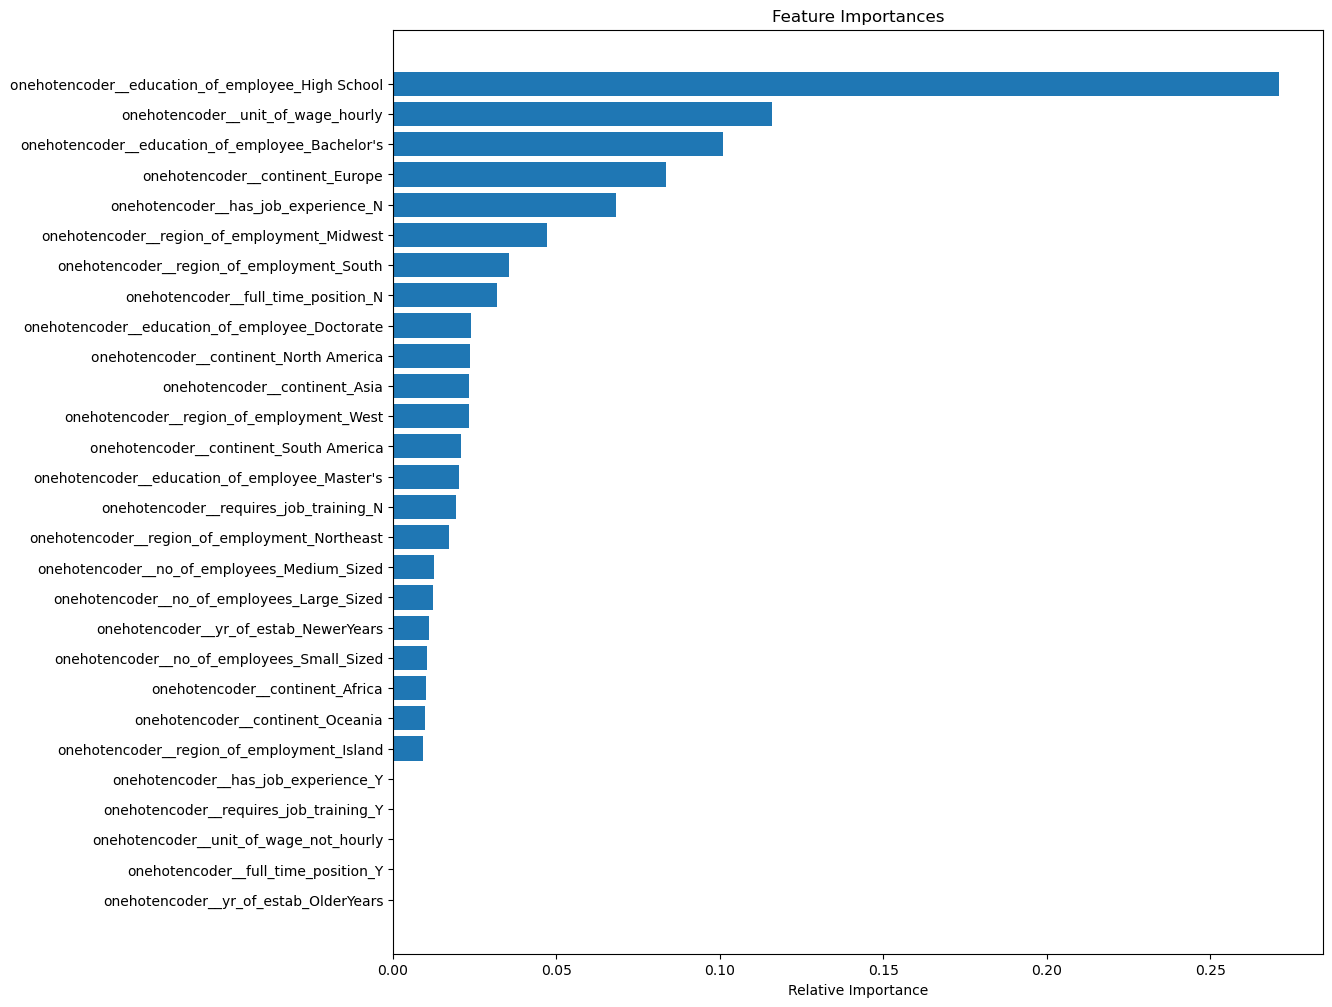

In [67]:
# Plot the importance
feature_names = col_trans.get_feature_names_out()
importances = impt_feat['HyperParam_xgbc']
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()